**Step 1: Importing necessary libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

**Step 2: Uploading the CSV file**

In [3]:
from google.colab import files
file = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


**Step 3 : Load the Dataset**

In [6]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Step 4 : Checking if there are null values in dataset**

In [8]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [12]:
df.shape

(200, 5)

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


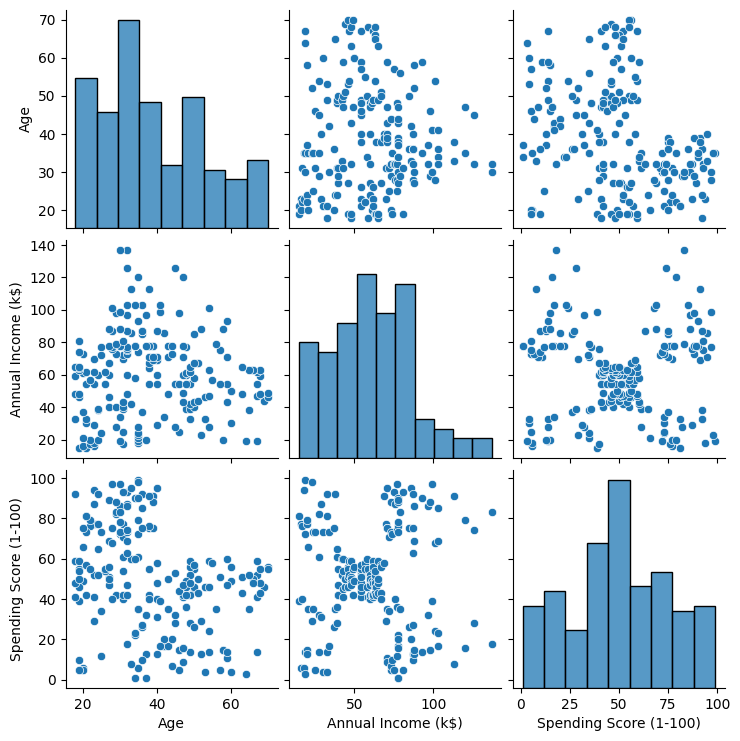

In [13]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

In [15]:
df = df.drop('CustomerID',axis=1)

In [38]:
df = df.drop('Gender',axis=1)

In [41]:
df.isnull().sum()

,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


**Step 5: Data PreProcessing**

In [43]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

**Step 6 : Elbow Method**

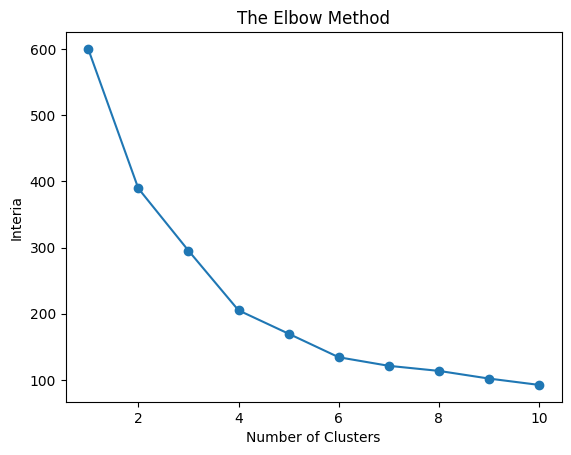

In [45]:
interia = []
K_range = range(1,11)
for i in K_range:
  kmeans = KMeans(n_clusters=i,random_state=42)
  kmeans.fit(df_scaled)
  interia.append(kmeans.inertia_)

plt.plot(K_range,interia,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Interia')
plt.title('The Elbow Method')
plt.show()

In [48]:
k =5
kmeans = KMeans(n_clusters=k,random_state=42)
kmeans.fit(df_scaled)
clusters = kmeans.labels_
df['Cluster'] = clusters

score = silhouette_score(df_scaled,clusters)
print("Silhouette Score :", score)

Silhouette Score : 0.40846873777345605


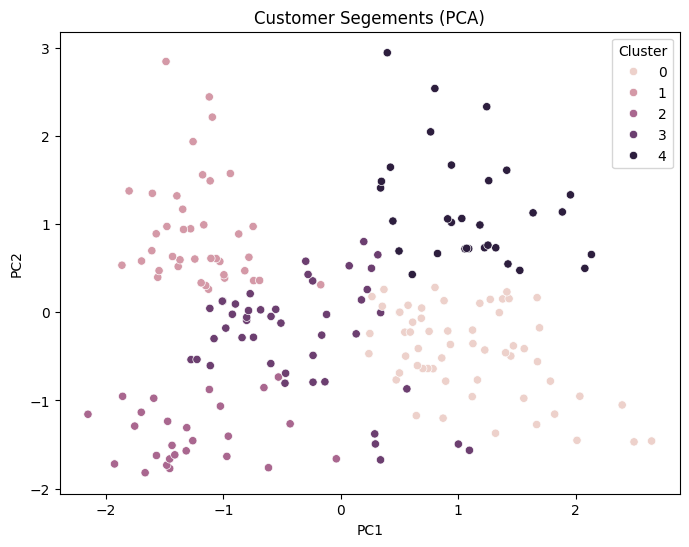

In [50]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca,columns=['PC1','PC2'])


df_pca['Cluster'] = clusters

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1',y='PC2',hue='Cluster',data=df_pca)
plt.title('Customer Segements (PCA)')
plt.show()

In [52]:
print("\nCluster Characteristics")
print(df.groupby('Cluster').mean())


Cluster Characteristics
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.275862           47.620690               41.706897
1        32.875000           86.100000               81.525000
2        25.769231           26.115385               74.846154
3        26.733333           54.311111               40.911111
4        44.387097           89.774194               18.483871
